In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import numpy as np 
import pickle

In [2]:
DATASET_PATH = r'Crop_recommendation.csv'

In [3]:
dataset = pd.read_csv(DATASET_PATH)

In [4]:
dataset.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [5]:
dataset = dataset.drop(columns = ['N','P','K'])

In [6]:
set(dataset.label)

{'apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon'}

C:\Users\badr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


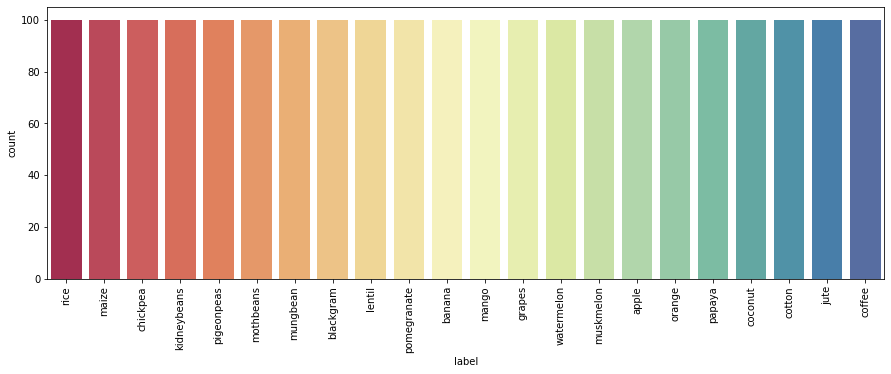

In [7]:
f= plt.figure(figsize=(15,5))
sns.countplot(dataset['label'] , palette = 'Spectral')
plt.xticks(rotation=90)
plt.show()

In [9]:
X = dataset.drop(['label'], axis=1).values
Y = dataset['label'].values

In [10]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [11]:
model = RandomForestClassifier()
model.fit(X_Train,Y_Train)

RandomForestClassifier()

In [12]:
RF_accuracy = model.score(X_Test,Y_Test)

In [13]:
round(RF_accuracy * 100 , 2)  

95.82

In [14]:
def predict(model,temperature, humidity,ph,rainfal):
    try:
        return model.predict_proba([[temperature,humidity,ph,rainfal]])
    except:
        print("Error in prediction process")
        return False

In [15]:
def prediction_as_list(model , prediction):
    j = 0
    result = []
    for i in prediction[0]:
        result.append([ model.classes_[j] , int(i * 100) ])
        j+=1
    return result

In [16]:
prediction_as_list( model , predict(model,27.35,55.99,7.13,148) )

[['apple', 0],
 ['banana', 0],
 ['blackgram', 0],
 ['chickpea', 0],
 ['coconut', 0],
 ['coffee', 100],
 ['cotton', 0],
 ['grapes', 0],
 ['jute', 0],
 ['kidneybeans', 0],
 ['lentil', 0],
 ['maize', 0],
 ['mango', 0],
 ['mothbeans', 0],
 ['mungbean', 0],
 ['muskmelon', 0],
 ['orange', 0],
 ['papaya', 0],
 ['pigeonpeas', 0],
 ['pomegranate', 0],
 ['rice', 0],
 ['watermelon', 0]]

In [17]:
# Save Model
pickle.dump(model, open("crop_suggestion_model.sav", 'wb'))